In [1]:
## data cleaning and exploration
## data exploration/ exploratory analysis - univariate, multi variate, PCA
## build model
## output

## improvise:
## use exploration results
## visualize exploration results
## feature selection
## missing value replacement

## problems to tackle:
## feature selection: bmi can be dropped (find independent variables)
## class imbalance between accepted and denied - overfitting/ underfitting

### Problem Apparoach
##### Step 1
1. data cleaning and exploration
2. data exploration - exploratory analysis - univariate, multi variate, PCA
3. build model
4. output

##### Step 2 - Improvise
1. Use exploration resuslts
2. visualize exploration results
3. feature selection
4. missing value replacement

##### Problems to tackle
1. feature selection: bmi can be dropped (find independent variables)
2. overfitting/ underfitting (class imbalance)


##### Thoughts
1. Pick accepted and denied classes, rest no need for training
2. Some BMI values are incorrect assuming height and weight are correct. Height in cm, weight in kg
3. Maybe create new features from the existing ones?
4. BMI formula: bmi = w / ((h/100)*(h/100))
5. for visualizations, get rid of Nans

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
import speedml

from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

In [3]:
## read csv file, format columns, remove unnecessary column
df = pd.read_csv('TestData_v2.csv')
df.columns = df.columns.str.replace(' ', '')
df.drop(['Unnamed:0'], axis=1, inplace=True)
# df.PatientID = df.PatientID.astype('int')

In [ ]:
df.PatientID = df.PatientID.astype('int')

In [4]:
## drop rows with all Nan values
df.dropna(how='all', inplace=True)
df.reset_index(drop=True, inplace=True)

In [5]:
df = df[df['Label'].isin(['Accepted', 'Denied'])]
# replace_map = {'Label': {'Denied': 0, 'Accepted': 1}}
# labels = df['Label'].astype('category').cat.categories.tolist()
# replace_map_comp = {'Label' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
# df_replace = df.copy()
# df_replace.replace(replace_map_comp, inplace=True)

In [38]:
replace_map_comp

{'Label': {'Accepted': 1, 'Denied': 2}}

In [6]:
df.shape

(636, 55)

In [32]:
df_replace.head(100)

,Height,Weight,BMI,AbdominalCircumference,FourKHz,OneKHz,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrineProtein,UrineSugar,Urobilinogen,OccultBlood,Ketones,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,HBAntigen,TPHA,CRP,HCVAntibody,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID,Label,LabelID
0,168.1,NaN,NaN,73.90,one,one,NaN,NaN,NaN,NaN,one,one,one,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.00,NaN,17.00,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3956543.0,1,0
1,172.1,65.7,22.0,85.00,one,one,NaN,NaN,144.0,NaN,NaN,zero,one,NaN,NaN,7500.0,482.0,13.00,45.5,94.0,30.7,32.5,28.3,12.00,NaN,12.00,21.0,172.0,268.0,0.30,9.9,0.87,NaN,83.00,54.0,130.0,7.90,NaN,49.0,4.6,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,0.005,NaN,3964292.0,1,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3965820.0,1,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3965847.0,1,0
5,174.8,74.3,NaN,86.00,NaN,NaN,NaN,NaN,NaN,NaN,one,NaN,NaN,NaN,NaN,7100.0,560.0,16.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3967976.0,1,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3968855.0,1,0
7,NaN,NaN,23.0,80.40,one,zero,4.59,NaN,NaN,one,NaN,zero,one,NaN,5.0,NaN,NaN,14.00,NaN,NaN,NaN,NaN,22.4,30.00,NaN,28.00,2.0,190.0,NaN,NaN,NaN,NaN,63.1,47.00,NaN,173.0,NaN,NaN,56.0,7.9,one,one,NaN,one,NaN,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978258.0,2,1
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978282.0,1,0
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978288.0,1,0
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978292.0,1,0


In [7]:
##convert categorical variables into string or category codes - str or int 
## all object dtypes into str
df.Label = df.Label.astype('category')
df['LabelID'] = df.Label.cat.codes

In [28]:
df.head(100)

,Height,Weight,BMI,AbdominalCircumference,FourKHz,OneKHz,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrineProtein,UrineSugar,Urobilinogen,OccultBlood,Ketones,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,HBAntigen,TPHA,CRP,HCVAntibody,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID,Label,LabelID
0,168.1,NaN,NaN,73.90,one,one,NaN,NaN,NaN,NaN,one,one,one,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.00,NaN,17.00,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3956543.0,Accepted,0
1,172.1,65.7,22.0,85.00,one,one,NaN,NaN,144.0,NaN,NaN,zero,one,NaN,NaN,7500.0,482.0,13.00,45.5,94.0,30.7,32.5,28.3,12.00,NaN,12.00,21.0,172.0,268.0,0.30,9.9,0.87,NaN,83.00,54.0,130.0,7.90,NaN,49.0,4.6,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,0.005,NaN,3964292.0,Accepted,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3965820.0,Accepted,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3965847.0,Accepted,0
5,174.8,74.3,NaN,86.00,NaN,NaN,NaN,NaN,NaN,NaN,one,NaN,NaN,NaN,NaN,7100.0,560.0,16.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3967976.0,Accepted,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3968855.0,Accepted,0
7,NaN,NaN,23.0,80.40,one,zero,4.59,NaN,NaN,one,NaN,zero,one,NaN,5.0,NaN,NaN,14.00,NaN,NaN,NaN,NaN,22.4,30.00,NaN,28.00,2.0,190.0,NaN,NaN,NaN,NaN,63.1,47.00,NaN,173.0,NaN,NaN,56.0,7.9,one,one,NaN,one,NaN,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978258.0,Denied,1
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978282.0,Accepted,0
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978288.0,Accepted,0
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978292.0,Accepted,0


In [8]:
cat_columns = ['FourKHz', 'OneKHz', 'UrineProtein', 'UrineSugar', 'Urobilinogen', 'OccultBlood', 'Ketones', 'HBAntigen',
               'TPHA', 'HCVAntibody']

for col in cat_columns:
    df[col] = df[col].astype('category')    
    print(col, dict(enumerate(df[col].cat.categories)))
#     df[col] = df[col].cat.codes
    
#     df[str(col)] = pd.Categorical(df[str(col)])
#     df[str(col)] = df[str(col)].cat.codes
    
#     key_map = dict(enumerate(df[col].cat.categories))
#     key_map.update({0: 'zero', 1: 'one'})
#     print(key_map)
#     df.replace({col: key_map}, inplace=True)
#     df['mycol_codes'] = df['mycol'].cat.codes
#     df['mycol_reversed'] = df['mycol_codes'].map(d)

FourKHz {0: 'one', 1: 'zero'}
OneKHz {0: 'one', 1: 'zero'}
UrineProtein {0: 'one', 1: 'zero'}
UrineSugar {0: 'one', 1: 'zero'}
Urobilinogen {0: 'one', 1: 'zero'}
OccultBlood {0: 'one', 1: 'zero'}
Ketones {0: 'one', 1: 'zero'}
HBAntigen {0: 'one'}
TPHA {0: 'one'}
HCVAntibody {0: 'one', 1: 'zero'}


In [17]:
## calculate or update BMI
# df['BMI'] = df['Weight'] / ((df['Height']/100) * (df['Height']/100))
# df['BMI'] = df.apply(
#     lambda row: row['Weight']/((row['Height']/100)*(row['Height']/100)) if np.isnan(row['BMI']) else row['BMI'],
#     axis=1
# )

In [9]:
df.groupby('Label').describe()

Height                                                               \
          count        mean       std    min      25%    50%      75%    max   
Label                                                                          
Accepted   99.0  169.282828  8.882051  119.0  166.500  170.0  173.100  190.0   
Denied     32.0  169.362500  7.773352  157.2  161.875  170.0  175.025  183.6   

         Weight                                                              \
          count       mean        std   min     25%    50%       75%    max   
Label                                                                         
Accepted   99.0  70.705354  45.404214  22.0  57.800  64.00  72.30000  480.0   
Denied     24.0  83.179792  67.457047  22.0  54.625  65.85  85.12875  373.0   

           BMI                                                     \
         count       mean       std   min   25%   50%   75%   max   
Label                                                               
Accepted  79.0  23.592532  4.971887  13.5  20.9  23.0  25.0  40.7   
Denied    33.0  22.978788  3.778869  17.2  20.1  22.5  25.5  32.1   

         AbdominalCircumference                                           \
                          count       mean        std   min    25%   50%   
Label                                                                      
Accepted                   69.0  83.168261  16.503291  39.0  81.00  84.9   
Denied                     19.0  87.021053  17.492684  35.3  83.45  85.0   

                      VitalCapacity                                            \
           75%    max         count      mean       std  min  25%   50%   75%   
Label                                                                           
Accepted  85.0  185.0          19.0  2.731053  1.622782  1.0  1.0  3.00  4.12   
Denied    91.5  130.0          17.0  2.967059  2.063067  1.0  1.0  2.64  4.28   

               BloodPressureSecond                                           \
           max               count       mean        std   min    25%   50%   
Label                                                                         
Accepted  5.15                48.0  79.368750  17.298237  31.7  69.75  80.0   
Denied    7.00                11.0  73.454545   8.201995  57.0  69.50  76.0   

                       BloodPressureFirst              ...   Lym         TTT  \
            75%    max              count        mean  ...   75%   max count   
Label                                                  ...                     
Accepted  84.25  147.0               59.0  113.374576  ...  33.1  51.9  23.0   
Denied    79.50   84.0               18.0  108.911111  ...  28.9  71.0   9.0   

                                                      RightEyeCorrection  \
              mean       std  min  25%  50%  75%  max              count   
Label                                                                      
Accepted  3.139130  2.147459  1.0  1.0  3.0  4.5  8.4               51.0   
Denied    2.055556  1.628735  1.0  1.0  1.0  2.0  5.5               14.0   

                                                        Prostate            \
              mean       std  min   25%  50%   75%  max    count      mean   
Label                                                                        
Accepted  1.984314  2.219132  0.2  0.85  1.0  1.75  9.0     34.0  1.251382   
Denied    2.128571  1.884932  0.3  1.00  1.6  2.75  7.0     35.0  1.063000   

                                                  LeftEyeCorrection            \
               std    min   25%  50%     75%  max             count      mean   
Label                                                                           
Accepted  0.826867  0.005  0.81  1.0  1.2875  3.0              51.0  1.733333   
Denied    0.712109  0.295  0.59  1.0  1.1315  3.0              14.0  1.957143   

                                                PatientID                \
               std  min   25%

In [10]:
df.groupby('Label').describe()

Height                                                               \
          count        mean       std    min      25%    50%      75%    max   
Label                                                                          
Accepted   99.0  169.282828  8.882051  119.0  166.500  170.0  173.100  190.0   
Denied     32.0  169.362500  7.773352  157.2  161.875  170.0  175.025  183.6   

         Weight                                                              \
          count       mean        std   min     25%    50%       75%    max   
Label                                                                         
Accepted   99.0  70.705354  45.404214  22.0  57.800  64.00  72.30000  480.0   
Denied     24.0  83.179792  67.457047  22.0  54.625  65.85  85.12875  373.0   

           BMI                                                     \
         count       mean       std   min   25%   50%   75%   max   
Label                                                               
Accepted  79.0  23.592532  4.971887  13.5  20.9  23.0  25.0  40.7   
Denied    33.0  22.978788  3.778869  17.2  20.1  22.5  25.5  32.1   

         AbdominalCircumference                                           \
                          count       mean        std   min    25%   50%   
Label                                                                      
Accepted                   69.0  83.168261  16.503291  39.0  81.00  84.9   
Denied                     19.0  87.021053  17.492684  35.3  83.45  85.0   

                      VitalCapacity                                            \
           75%    max         count      mean       std  min  25%   50%   75%   
Label                                                                           
Accepted  85.0  185.0          19.0  2.731053  1.622782  1.0  1.0  3.00  4.12   
Denied    91.5  130.0          17.0  2.967059  2.063067  1.0  1.0  2.64  4.28   

               BloodPressureSecond                                           \
           max               count       mean        std   min    25%   50%   
Label                                                                         
Accepted  5.15                48.0  79.368750  17.298237  31.7  69.75  80.0   
Denied    7.00                11.0  73.454545   8.201995  57.0  69.50  76.0   

                       BloodPressureFirst              ...   Lym         TTT  \
            75%    max              count        mean  ...   75%   max count   
Label                                                  ...                     
Accepted  84.25  147.0               59.0  113.374576  ...  33.1  51.9  23.0   
Denied    79.50   84.0               18.0  108.911111  ...  28.9  71.0   9.0   

                                                      RightEyeCorrection  \
              mean       std  min  25%  50%  75%  max              count   
Label                                                                      
Accepted  3.139130  2.147459  1.0  1.0  3.0  4.5  8.4               51.0   
Denied    2.055556  1.628735  1.0  1.0  1.0  2.0  5.5               14.0   

                                                        Prostate            \
              mean       std  min   25%  50%   75%  max    count      mean   
Label                                                                        
Accepted  1.984314  2.219132  0.2  0.85  1.0  1.75  9.0     34.0  1.251382   
Denied    2.128571  1.884932  0.3  1.00  1.6  2.75  7.0     35.0  1.063000   

                                                  LeftEyeCorrection            \
               std    min   25%  50%     75%  max             count      mean   
Label                                                                           
Accepted  0.826867  0.005  0.81  1.0  1.2875  3.0              51.0  1.733333   
Denied    0.712109  0.295  0.59  1.0  1.1315  3.0              14.0  1.957143   

                                                PatientID                \
               std  min   25%

In [11]:
accepted = df[df['Label'] == 'Accepted']
denied = df[df['Label'] == 'Denied']
# pending = df[df['Label'] == 'Pending']
# referred = df[df['Label'] == 'Referred']

In [12]:
accepted_per = round(len(accepted.Label)/(len(accepted.Label)+len(denied.Label)), 2)
denied_per = round(len(denied.Label)/(len(accepted.Label)+len(denied.Label)), 2)
# denied_per = denied.count()/(accepted.count()+denied.count())

In [13]:
print(accepted_per)
print(denied_per)

## classes are imbalanced

0.72
0.28


In [14]:
df.groupby('Label').mean()

,Height,Weight,BMI,AbdominalCircumference,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,CRP,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID,LabelID
Label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Accepted,169.282828,70.705354,23.592532,83.168261,2.731053,79.368750,113.374576,5.181635,6043.183673,457.244186,13.584896,44.312000,93.100000,30.962712,33.518182,28.733000,20.367756,11.802632,23.794480,35.289154,172.874516,219.672131,1.063475,14.893939,0.887789,78.006176,65.527923,105.455000,111.786296,6.739118,1.494000,69.545455,4.973165,0.144167,5.405849,94.171642,100.058824,21.550278,23.603448,3.139130,1.984314,1.251382,1.733333,4.018137e+06,0
Denied,169.362500,83.179792,22.978788,87.021053,2.967059,73.454545,108.911111,5.539286,6040.000000,390.916667,12.064706,42.741667,93.107143,34.812121,31.366061,28.157576,25.048718,10.232069,21.265625,35.322507,182.571429,202.244828,1.317667,14.975000,0.789574,75.422222,68.115385,119.615152,119.727273,6.800000,1.621333,71.666667,4.373333,0.105947,6.011053,105.826087,98.873684,17.880000,22.786667,2.055556,2.128571,1.063000,1.957143,4.020214e+06,1


In [15]:
denied.describe()

,Height,Weight,BMI,AbdominalCircumference,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,CRP,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID,LabelID
count,32.000000,24.000000,33.000000,19.000000,17.000000,11.000000,18.000000,28.000000,14.000000,36.000000,34.000000,36.000000,28.000000,33.000000,33.000000,33.000000,78.000000,29.000000,64.000000,73.000000,21.000000,29.000000,30.000000,4.000000,47.000000,18.000000,52.000000,33.000000,44.000000,13.000000,15.000000,15.000000,30.000000,19.000000,19.000000,23.000000,19.000000,10.000000,15.000000,9.000000,14.000000,35.000000,14.000000,1.780000e+02,178.0
mean,169.362500,83.179792,22.978788,87.021053,2.967059,73.454545,108.911111,5.539286,6040.000000,390.916667,12.064706,42.741667,93.107143,34.812121,31.366061,28.157576,25.048718,10.232069,21.265625,35.322507,182.571429,202.244828,1.317667,14.975000,0.789574,75.422222,68.115385,119.615152,119.727273,6.800000,1.621333,71.666667,4.373333,0.105947,6.011053,105.826087,98.873684,17.880000,22.786667,2.055556,2.128571,1.063000,1.957143,4.020214e+06,1.0
std,7.773352,67.457047,3.778869,17.492684,2.063067,8.201995,31.110768,2.181291,1515.392815,184.324772,3.638172,5.604660,11.654499,16.114430,4.836632,17.894396,20.117814,17.287567,14.329304,30.230007,53.305320,81.937492,0.908833,5.286067,0.179600,11.048905,30.769640,80.400832,39.419251,0.921954,0.733474,29.851218,2.792222,0.102891,1.790837,51.546671,26.296025,8.579666,16.265953,1.628735,1.884932,0.712109,3.157339,1.390724e+04,0.0
min,157.200000,22.000000,17.200000,35.300000,1.000000,57.000000,39.000000,3.000000,3800.000000,53.000000,5.500000,29.000000,76.000000,24.000000,12.780000,10.400000,1.000000,1.000000,4.000000,1.000000,45.000000,21.000000,0.200000,9.700000,0.300000,55.900000,31.000000,30.000000,58.000000,4.000000,1.000000,37.000000,1.000000,0.010000,3.000000,75.000000,36.000000,3.000000,8.100000,1.000000,0.300000,0.295000,0.100000,3.978258e+06,1.0
25%,161.875000,54.625000,20.100000,83.450000,1.000000,69.500000,85.525000,4.000000,5125.000000,300.500000,8.000000,40.675000,88.950000,29.000000,31.000000,21.000000,13.250000,4.000000,11.325000,13.000000,155.000000,152.000000,0.727500,11.800000,0.700000,67.700000,44.750000,61.000000,95.250000,6.800000,1.200000,51.500000,1.000000,0.031000,5.200000,88.500000,89.000000,10.900000,10.900000,1.000000,1.000000,0.590000,0.300000,4.013091e+06,1.0
50%,170.000000,65.850000,22.500000,85.000000,2.640000,76.000000,120.000000,5.250000,5950.000000,467.000000,13.200000,43.400000,90.350000,31.000000,32.700000,23.800000,21.500000,4.300000,18.000000,26.100000,183.000000,201.100000,1.000000,14.100000,0.780000,78.650000,61.500000,99.000000,118.000000,7.000000,1.500000,63.000000,5.200000,0.100000,5.600000,98.000000,99.000000,19.950000,18.900000,1.000000,1.600000,1.000000,1.000000,4.016826e+06,1.0
75%,175.025000,85.128750,25.500000,91.500000,4.280000,79.500000,129.750000,6.000000,6925.000000,515.250000,14.850000,45.925000,96.000000,33.200000,34.000000,27.000000,30.000000,4.600000,29.000000,50.000000,211.000000,229.000000,1.800000,17.275000,0.890000,81.950000,78.750000,167.000000,148.750000,7.200000,1.750000,80.000000,7.000000,0.120000,6.150000,108.000000,108.500000,23.550000,28.900000,2.000000,2.750000,1.131500,1.425000,4.032582e+06,1.0
max,183.600000,373.000000,32.100000,130.000000,7.000000,84.000000,162.000000,15.000000,9100.000000,642.000000,17.100000,57.000000,146.000000,101.000000,35.000000,85.000000,97.000000,65.700000,68.000000,132.000000,314.000000,397.000000,3.900000,22.000000,1.190000,99.000000,174.000000,311.000000,215.000000,7.600000,4.000000,134.000000,8.300000,0.330000,9.600000,336.000000,181.000000,28.000000,71.000000,5.500000,7.000000,3.000000,12.000000,4.037800e+06,1.0


In [16]:
df.corr()

,Height,Weight,BMI,AbdominalCircumference,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,CRP,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID,LabelID
Height,1.000000,-0.050665,0.244780,0.123273,0.370360,-0.076388,0.172352,-0.091046,-0.218024,-0.020743,0.009059,0.124206,0.015163,0.170853,-0.003226,0.041496,-0.123504,0.105023,0.036258,0.037145,0.009464,0.364937,-0.172791,0.099864,0.192969,0.400038,0.061926,0.250832,0.062690,-0.256852,-0.251284,0.310671,-0.108590,0.069382,-0.069119,0.119897,0.260345,-0.542643,0.551832,-0.097065,-0.261297,0.019249,-0.134093,-0.052677,0.003998
Weight,-0.050665,1.000000,0.066717,0.107484,-0.557419,0.047578,0.317511,0.427989,0.063247,-0.075466,0.299568,0.217418,0.084961,0.288265,0.183617,0.099383,0.112846,-0.028537,0.163383,-0.004681,-0.099391,-0.330227,-0.119629,-0.290107,0.170778,-0.029885,-0.083197,-0.033764,-0.129949,0.103642,-0.424955,0.176795,-0.012329,0.590732,-0.073127,-0.159455,-0.002492,-0.284654,-0.290469,-0.002163,0.309241,-0.134928,-0.036135,0.111693,0.098520
BMI,0.244780,0.066717,1.000000,0.025686,-0.607948,-0.050847,0.177024,-0.085758,0.143424,0.282630,0.398879,0.096663,-0.114352,-0.186027,0.000338,-0.045588,0.202200,-0.222545,0.020603,0.207888,-0.094914,0.098328,-0.021826,-0.148254,0.067157,-0.239403,-0.124253,0.387642,0.278995,-0.078435,-0.341561,0.141971,0.149867,-0.167537,0.070244,-0.179855,0.362272,-0.055098,-0.208515,-0.367055,0.023946,-0.180366,0.173637,0.037542,-0.060520
AbdominalCircumference,0.123273,0.107484,0.025686,1.000000,0.164810,0.250138,-0.330194,-0.110263,0.581683,-0.042135,0.032636,-0.021723,-0.148162,-0.085044,0.078125,-0.031731,0.185109,-0.284823,-0.048791,-0.031819,-0.100651,0.185161,-0.276860,-0.301291,0.017038,0.046511,-0.003208,0.084808,0.160054,-0.018517,-0.336476,-0.566184,-0.114146,0.637148,-0.043118,0.167253,-0.047309,0.126899,-0.064122,-0.130758,-0.142201,0.222035,-0.250738,0.118633,0.095496
VitalCapacity,0.370360,-0.557419,-0.607948,0.164810,1.000000,-0.404796,0.172449,-0.242688,-0.697027,-0.143166,-0.131137,0.056166,0.013197,0.123463,0.071189,-0.119108,-0.161477,0.419745,0.073892,-0.182990,-0.194565,0.143489,-0.310092,0.087045,0.007320,0.197436,0.205541,0.179737,0.271948,0.326472,0.293173,0.155341,-0.069293,-0.024799,0.007120,0.110890,-0.072515,-0.411040,-0.237827,0.836384,-0.792497,0.201954,-0.473034,-0.257428,0.065636
BloodPressureSecond,-0.076388,0.047578,-0.050847,0.250138,-0.404796,1.000000,0.405779,0.694458,0.005878,0.041583,-0.180058,-0.032108,-0.072753,-0.297638,-0.062787,-0.039712,0.033226,-0.141651,0.106970,-0.060192,0.066959,0.200288,0.199998,-0.233320,-0.189062,0.071753,0.003860,-0.351809,0.314702,0.033277,-0.507693,-0.020733,0.116750,0.292737,-0.234294,0.035879,-0.059015,0.162230,0.171778,0.024306,0.288265,-0.030634,-0.006584,0.037119,-0.144220
BloodPressureFirst,0.172352,0.317511,0.177024,-0.330194,0.172449,0.405779,1.000000,0.146366,0.044574,-0.155576,0.161173,0.240453,0.107934,0.145480,0.057248,0.231805,0.000133,0.373295,0.052190,0.153004,0.158999,0.144036,-0.648019,0.432242,0.012634,0.339390,-0.097132,-0.052716,0.144899,0.089989,0.086997,-0.254192,-0.014889,0.392886,-0.027870,0.030921,0.286852,-0.082179,0.087702,0.007402,0.188670,-0.434851,-0.039751,-0.120011,-0.067020
UrinePH,-0.091046,0.427989,-0.085758,-0.110263,-0.242688,0.694458,0.146366,1.000000,-0.336902,0.023488,-0.010926,0.190118,-0.095652,-0.149449,-0.196548,-0.039551,-0.030757,0.045892,-0.155616,-0.130589,0.056861,-0.126104,-0.499535,0.062023,-0.430180,-0.133248,-0.026175,-0.060511,0.178087,-0.048090,0.134647,-0.057348,0.334209,-0.214862,0.149062,0.213274,0.176879,-0.133941,-0.191380,0.187704,0.549817,0.259023,0.763193,-0.061384,0.079785
Leukocyte,-0.218024,0.063247,0.143424,0.581683,-0.697027,0.005878

In [16]:
df.corr()

,Height,Weight,BMI,AbdominalCircumference,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,CRP,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID,LabelID
Height,1.000000,-0.025290,0.100869,0.182919,0.276740,-0.068133,0.067379,0.010546,-0.284853,0.085750,0.019341,0.163194,0.054174,0.098145,0.082119,-0.026047,-0.047136,0.149662,0.083261,0.007368,0.248950,0.278966,-0.211743,0.022903,0.283241,0.281365,0.055007,0.246826,0.125059,-0.199722,-0.394837,-0.032092,-0.021134,0.081747,-0.122621,0.091934,0.258472,-0.498923,0.435224,-0.059144,0.085255,0.085677,-0.112225,-0.059450,0.008030
Weight,-0.025290,1.000000,0.297388,0.273493,-0.217167,0.067211,0.168161,0.294803,0.113522,-0.054457,0.217175,0.230996,-0.138233,0.024400,0.065265,-0.013469,0.123998,0.003246,0.124897,0.021062,0.219719,0.026558,-0.134216,-0.203002,0.085823,0.074454,-0.062669,0.076551,-0.028996,0.056919,-0.137307,-0.171549,0.023812,0.610452,-0.062688,-0.066412,0.234069,-0.244393,-0.185672,-0.178631,0.231903,-0.054933,-0.083327,0.116957,0.037352
BMI,0.100869,0.297388,1.000000,0.061393,-0.286010,0.005519,0.304699,0.374896,0.219972,-0.033124,0.238269,0.209550,-0.043172,-0.009381,-0.009281,-0.032537,0.160898,-0.091259,0.071733,0.237568,0.162830,0.104781,0.007213,-0.297541,-0.011919,0.000224,-0.023207,0.318765,0.263039,-0.003071,-0.270268,-0.109477,0.200835,0.188674,0.216654,-0.048337,0.276632,0.066353,-0.166913,-0.245811,-0.115367,-0.092388,0.004647,-0.090648,0.280160
AbdominalCircumference,0.182919,0.273493,0.061393,1.000000,0.165330,0.160188,-0.228432,0.088307,0.446030,0.017441,0.071811,-0.008503,-0.086981,-0.038468,0.040632,-0.029863,0.152303,-0.245010,-0.026358,-0.008445,-0.057352,0.176430,-0.286636,-0.131143,0.117620,0.103557,-0.072537,0.096530,0.142970,0.022449,-0.304523,-0.443172,0.017012,0.150433,-0.283633,0.143511,0.059972,0.079204,0.014458,-0.087531,-0.127440,0.196386,-0.256404,0.058412,-0.001485
VitalCapacity,0.276740,-0.217167,-0.286010,0.165330,1.000000,-0.175118,0.249792,0.108292,-0.578106,-0.062680,0.035651,-0.115086,0.414221,0.183073,0.014575,0.042838,-0.117419,0.310175,0.229635,-0.101046,-0.047047,-0.050690,-0.353360,0.047717,-0.156219,0.201173,0.203057,0.116698,0.055702,0.393580,-0.454747,-0.051674,-0.253205,-0.151559,-0.133824,0.074332,0.138352,-0.289507,-0.267648,0.145408,-0.589772,0.048762,-0.354680,0.005122,0.241025
BloodPressureSecond,-0.068133,0.067211,0.005519,0.160188,-0.175118,1.000000,0.441875,0.379573,-0.033603,-0.049434,-0.048991,0.136304,-0.161605,0.078481,0.177358,-0.082553,-0.071174,-0.676201,-0.033899,-0.105235,-0.059315,0.037464,0.214715,-0.075275,-0.079994,-0.137877,-0.092242,-0.188591,0.202329,0.204760,-0.520716,0.198124,0.012365,0.286399,-0.083458,0.021900,-0.090618,-0.204555,-0.074926,-0.178670,-0.040648,0.303875,-0.035849,0.049293,-0.132189
BloodPressureFirst,0.067379,0.168161,0.304699,-0.228432,0.249792,0.441875,1.000000,0.114434,-0.015031,-0.168232,0.030837,0.322196,-0.053964,0.155626,0.155735,0.022485,-0.057156,0.284884,0.065391,0.029856,0.122721,0.332840,-0.316945,0.484219,-0.181051,0.270359,-0.071800,0.085563,0.273573,0.160544,-0.382154,-0.028800,0.170348,0.271855,0.146785,0.038514,0.192860,-0.010456,0.055133,0.115916,-0.241927,-0.270730,-0.148938,-0.038744,-0.040919
UrinePH,0.010546,0.294803,0.374896,0.088307,0.108292,0.379573,0.114434,1.000000,-0.170844,-0.019285,0.016939,-0.070462,-0.067919,-0.080493,-0.049116,-0.043744,0.021950,-0.007486,-0.073878,-0.121632,-0.017036,0.108713,-0.337590,-0.068584,-0.398562,0.000819,-0.053053,-0.110630,-0.112261,-0.106635,0.026958,-0.060849,0.109559,-0.021778,0.019615,-0.005490,0.042732,-0.023877,-0.207918,0.174493,0.156255,0.027415,0.105922,-0.037450,0.097846
Leukocyte,-0.284853,0.113522,0.219972,0.446030,-0.578106,-0.033603,-0.0

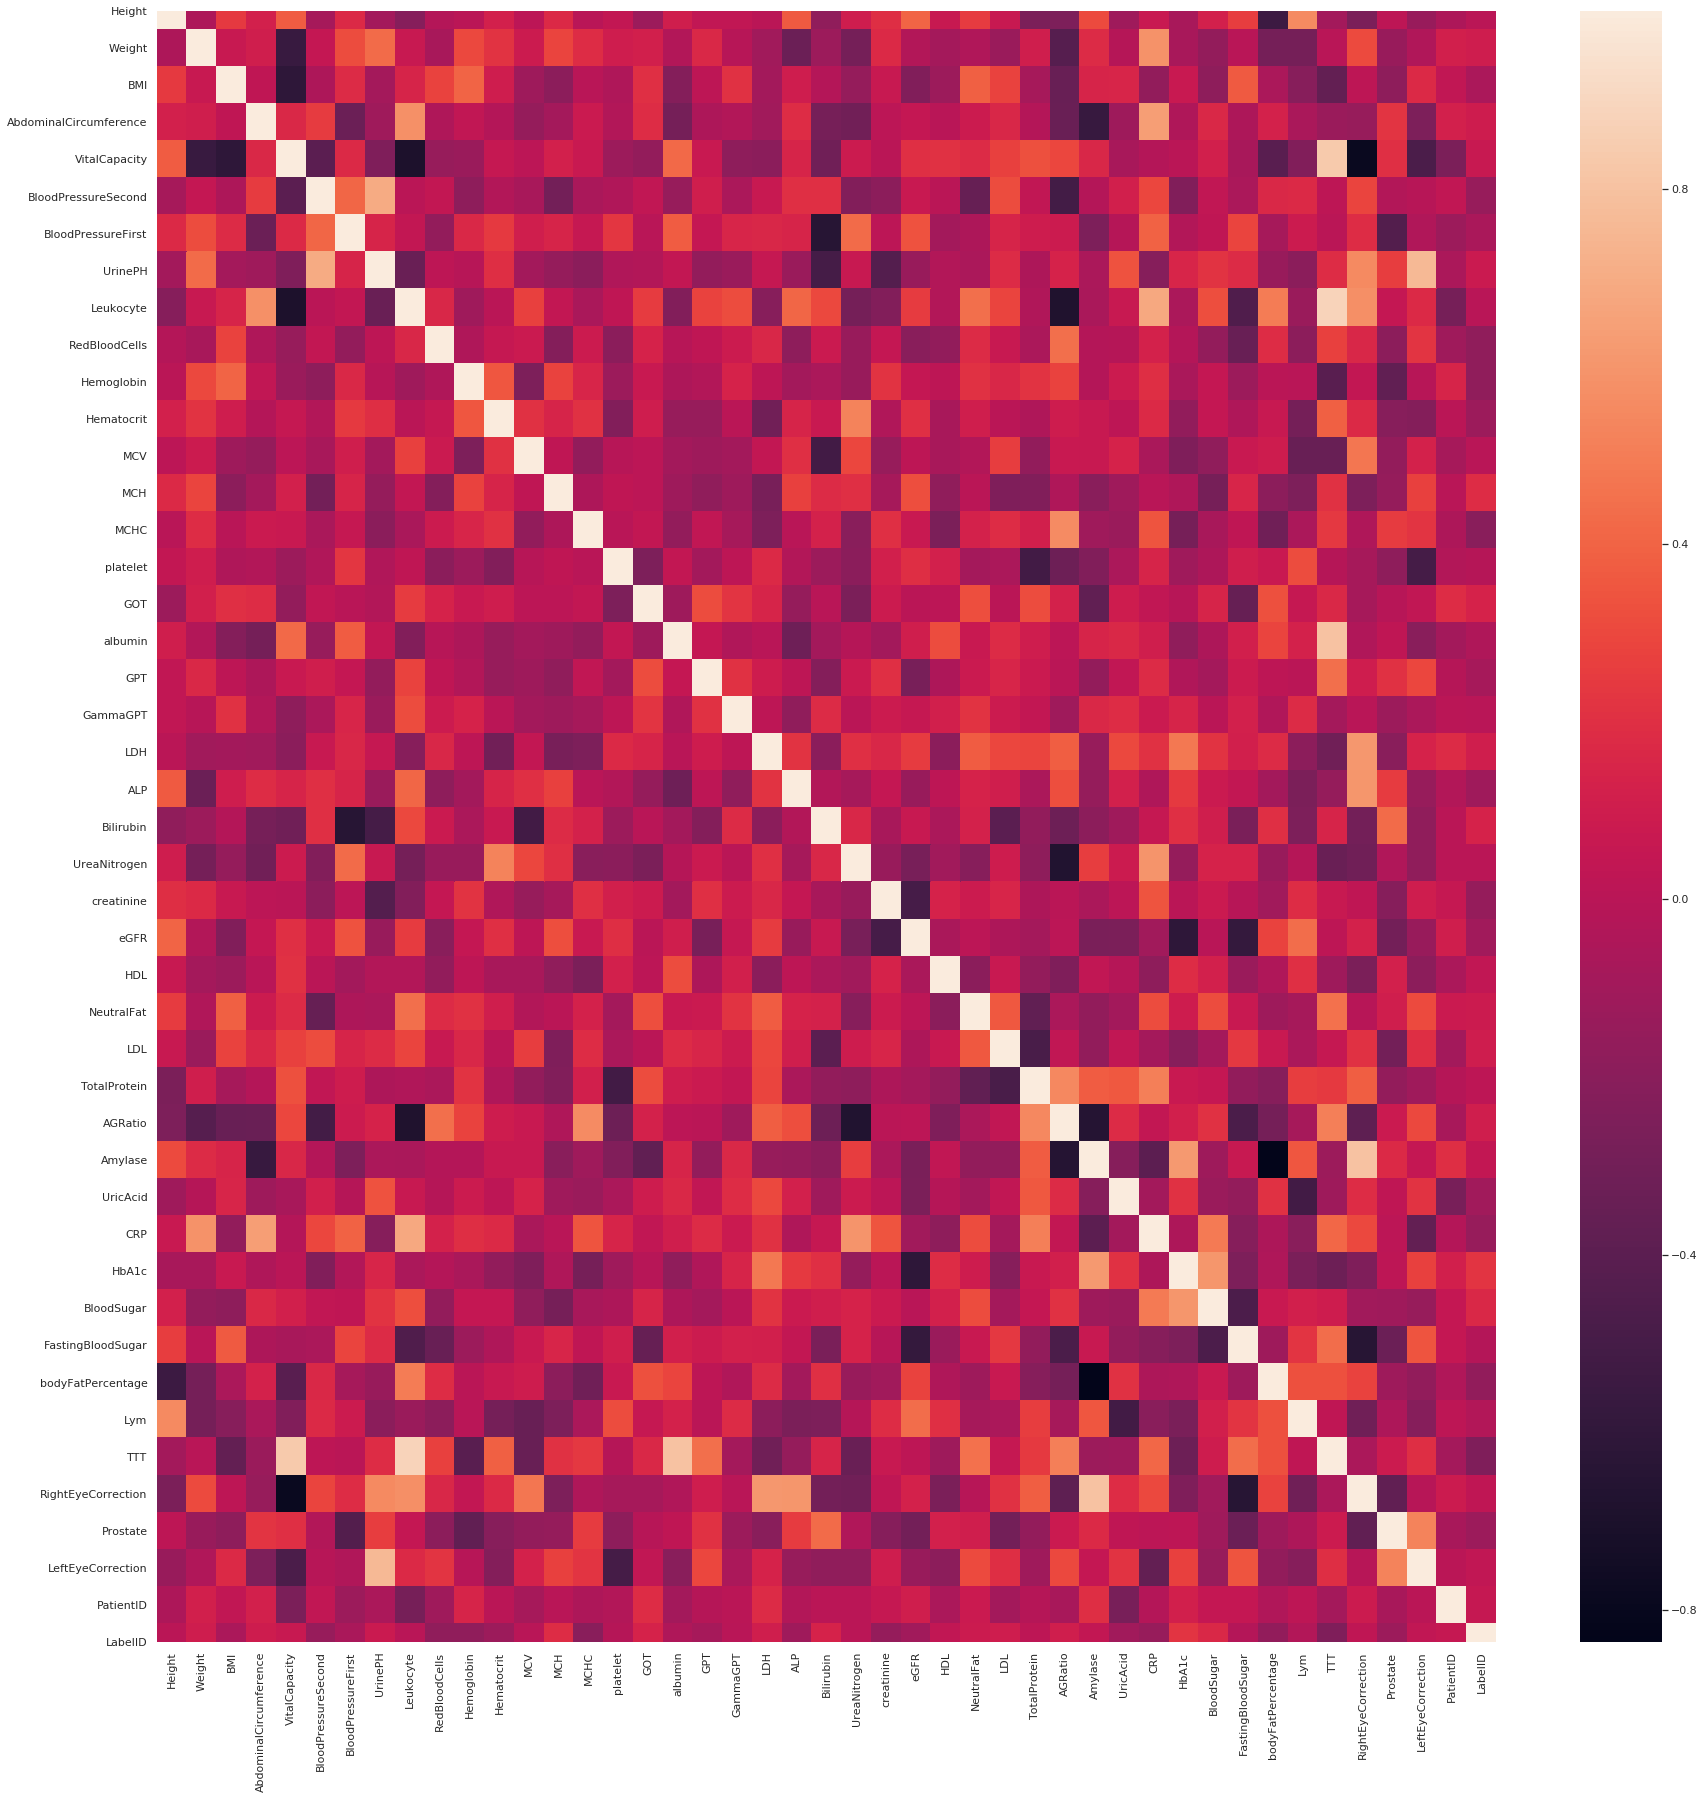

In [51]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr());

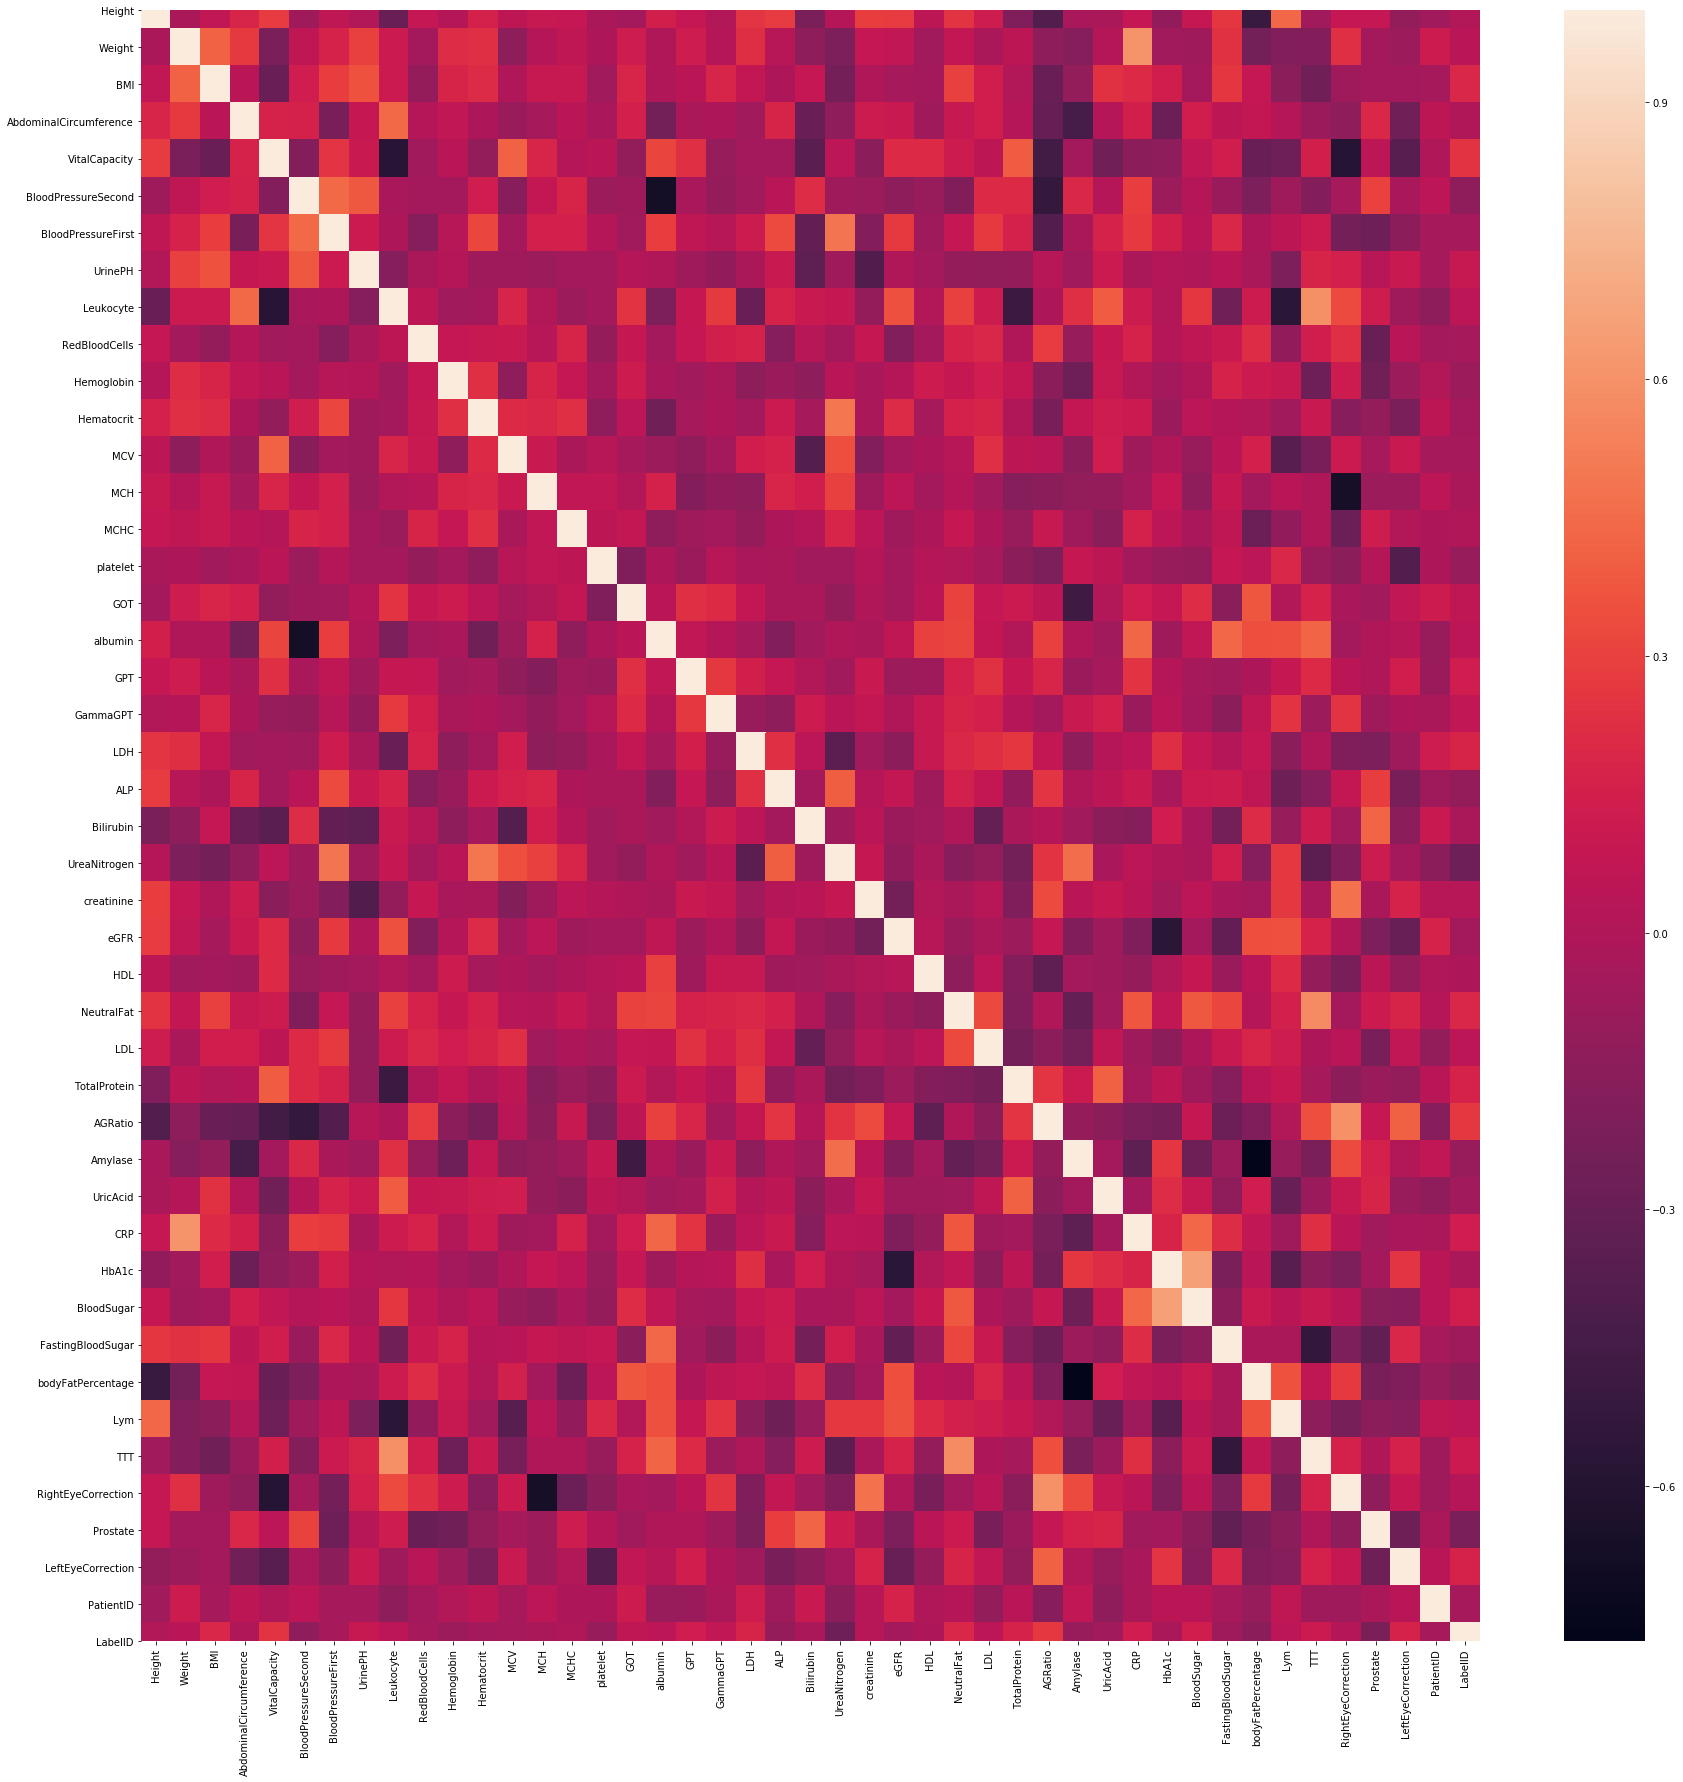

In [19]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr());